# Moons Classification with Neural Networks 

 Hi! In this code, I'm implementing a Neural Network model provided by PyTorch, for a classification task designed by Sklearn!

**1-** Importing necessary libraries:

In [25]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import torch
from torch import nn
import numpy as np
import mplcyberpunk                           # An optional library for modernizing matplotlib
                                              # Install: pip install mplcyberpunk

**2-** Loading the dataset and visualizing:

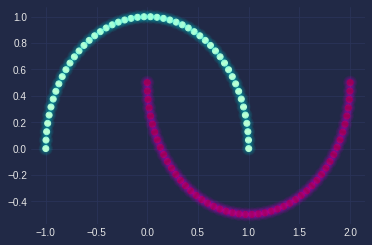

In [26]:
x, y = make_moons()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)
x_train = torch.from_numpy(x_train).type(torch.float)
y_train = torch.from_numpy(y_train).type(torch.float)
x_test = torch.from_numpy(x_test).type(torch.float)
y_test = torch.from_numpy(y_test).type(torch.float)
plt.style.use('cyberpunk')
plt.scatter(x[:,0],x[:,1],c=y,cmap=plt.cm.YlOrRd) #divides map depending on how y varies
mplcyberpunk.make_scatter_glow()
plt.show()


**3-** Designing a simple Neural Network model:

In [27]:
class moonRecognition(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Sequential(
            nn.Linear(2,16),
            nn.ReLU(),
            nn.Linear(16,1),
            nn.Sigmoid()
        )
    def forward(self,x: torch.Tensor) -> torch.Tensor :
        return self.layer1(x)
    

**4-** Testing the non-trained(raw) model on the test data:

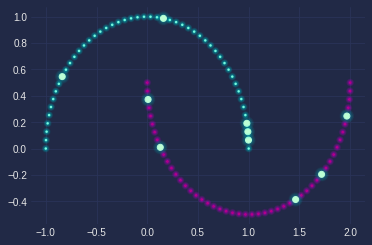

In [28]:
model = moonRecognition()
with torch.inference_mode():
    pred_y = model(x_test)
plt.scatter(x[:,0],x[:,1],c=y,cmap=plt.cm.YlOrRd,s=2)
mplcyberpunk.make_scatter_glow()
mplcyberpunk.make_scatter_glow()
plt.scatter(x_test[:,0],x_test[:,1],c=torch.round(pred_y),cmap=plt.cm.YlOrRd)
mplcyberpunk.make_scatter_glow()
plt.show()


**5-** Importing and instantiating a loss function and an optimizer:

In [29]:
from torch.nn import BCELoss
from torch.optim import Adam
criterion = BCELoss()
optimizer = Adam(params=model.parameters(),
                lr=0.1)


**6-** Building a training loop:

In [30]:
for epoch in range(1001):
    model.train()
    y_prediction = model(x_train).squeeze()
    loss = criterion(y_prediction, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch%100 == 0:
        print(f'epoch #{epoch} | loss: {loss}')
        

epoch #0 | loss: 0.6991332769393921
epoch #100 | loss: 0.01091613620519638
epoch #200 | loss: 0.0017581114079803228
epoch #300 | loss: 0.000845042522996664
epoch #400 | loss: 0.0005077117821201682
epoch #500 | loss: 0.0003401341673452407
epoch #600 | loss: 0.00024410166952293366
epoch #700 | loss: 0.00018427777104079723
epoch #800 | loss: 0.00014452023606281728
epoch #900 | loss: 0.0001153795383288525
epoch #1000 | loss: 9.490478259976953e-05


**7-** Testing the trained model:

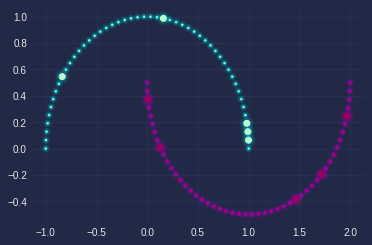

In [31]:
with torch.inference_mode():
    pred_y = model(x_test)
plt.scatter(x[:,0],x[:,1],c=y,cmap=plt.cm.YlOrRd,s=2)
mplcyberpunk.make_scatter_glow()
mplcyberpunk.make_scatter_glow()
plt.scatter(x_test[:,0],x_test[:,1],c=pred_y,cmap=plt.cm.YlOrRd)
mplcyberpunk.make_scatter_glow()
plt.show()


**8-** Testing random values:

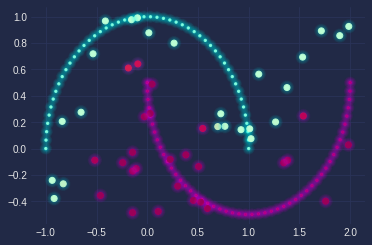

In [32]:
random_x_first_feature = torch.rand(50,1)
random_x_second_feature = torch.rand(50,1)
random_x_first_feature = random_x_first_feature * 3 - 1        #since first feature is in [-1,2]
random_x_second_feature = random_x_second_feature * 1.5 - 0.5  #since second feature is in [-0.5,1]
random_x = torch.hstack([random_x_first_feature,random_x_second_feature])

with torch.inference_mode():
    pred_y = model(random_x)
plt.scatter(x[:,0],x[:,1],c=y,cmap=plt.cm.YlOrRd,s=5)
mplcyberpunk.make_scatter_glow()
mplcyberpunk.make_scatter_glow()
plt.scatter(random_x[:,0],random_x[:,1],c=pred_y,cmap=plt.cm.YlOrRd)
mplcyberpunk.make_scatter_glow()
plt.show()


**9-** Plotting a contour map:

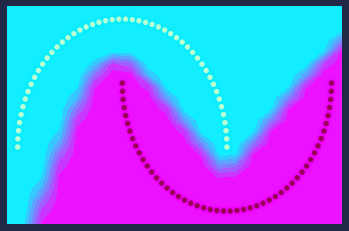

In [67]:
x_np = np.linspace(x_train[:,0].min()-0.1, x_train[:,0].max()+0.1,20)
y_np = np.linspace(x_train[:,1].min()-0.1, x_train[:,1].max()+0.1,20)

X, Y = np.meshgrid(x_np, y_np)

first_index_y = True
first_index_x = True

for i in x_np:
    for j in y_np:
        if(first_index_y):
            temp_y = model(torch.Tensor([i,j])).detach().numpy()
            first_index_y = False
        else:
            temp_y = np.vstack((temp_y,model(torch.Tensor([i,j])).detach().numpy()))
    first_index_y = True
    if(first_index_x):
        z = temp_y
        first_index_x = False
    else:
        z = np.hstack((z, temp_y))

plt.contourf(X,Y,z,cmap=plt.cm.cool)
plt.axis('off')
plt.scatter(x[:,0],x[:,1],c=y,cmap=plt.cm.YlOrRd,s=20)
mplcyberpunk.make_scatter_glow()
plt.show()